# Project - Dallas Shootings

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- A newspaper want a visualization of the shootings in Dallas with focus on subjects
- We will read data from from database and join into broader datasets
- We will explore ideas to visualize it and create a map with the shootings

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd

### Step 1.b: Connect to SQLite database
- Use `sqlite3.connect(<filename>)` to connect to the database `files/dallas-ois.sqlite`

In [3]:
import sqlite3

In [4]:
conn=sqlite3.connect('files/dallas-ois.sqlite')

### Step 1. c: Read data into DataFrames
- The database consists of 3 tables: `incident`, `officers`, `subjects`
- Read the data from each table into a DataFrame.
- HINT: Use `pandas` `read_sql(sql_stmt, conn)`, which takes the SQL statement (`sql_stmt`) and the data base connection `conn` from previous step.
- HINT: The structure of the SQL statement is as follows.
```SQL 
SELECT * FROM table
```

In [5]:
cursor=conn.cursor()

In [6]:
import pandas as pd

In [11]:
cursor.execute("PRAGMA table_info(officers)").fetchall()

[(0, 'case_number', 'TEXT', 0, None, 0),
 (1, 'race', 'TEXT', 0, None, 0),
 (2, 'gender', 'TEXT', 0, None, 0),
 (3, 'last_name', 'TEXT', 0, None, 0),
 (4, 'first_name', 'TEXT', 0, None, 0),
 (5, 'full_name', 'TEXT', 0, None, 0)]

In [20]:
data=pd.read_sql('select*from incidents',conn)

In [21]:
data

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,attorney_general_forms_url,summary_url,summary_text,latitude,longitude
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, February 23, 2013, at approximate...",NaN,NaN
1,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, May 3, 2010, at approximately 8:06 ...",NaN,NaN
2,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Sunday, August 12, 2007, at approximately 2...",NaN,NaN
3,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Saturday, May 26, 2007, at approximately 1:...",NaN,NaN
4,244659R,2006-04-03,6512 South Loop 12,Injured,Hands,"Watkins, Caleb B/M",1,"Armstrong, Michael W/M",1,No Bill,None,http://dallaspolice.net/reports/OIS/narrative/...,"On Monday, April 3, 2006, at approximately 11:...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,161616-2016,2016-07-03,7440 Chesterfield Drive,Shoot and Miss,Handgun,"Brown, Desroy B/M",1,"Crenshaw, Joshua W/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,7440 Chesterfield Drive 161616-2016\n\nOn July...,32.65628,-96.869793
215,141461-2016,2016-06-11,2700 Custer Drive,Shoot and Miss,Vehicle,Unknown B/M,1,"Moore, Douglas B/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,"2700 Custer Drive 141461-2016\n\nOn June 11, 2...",32.70483,-96.779494
216,089985-2016,2016-04-16,4800 Columbia Ave,Shoot and Miss,Handgun,Unknown L/M,1,"Ruben, Fredirick W/M",1,None,None,http://dallaspolice.net/reports/OIS/narrative/...,4800 Columbia Avenue 089985-2016\n\nOn April 1...,32.79473,-96.764017
217,177645-2016,2016-07-23,1716 Chattanooga Place,Shoot and Miss,Handgun,Unknown B/M,1,"Rosen, Brett W/M",1,None,None,None,None,32.81664,-96.851409


### Step 1.d: Explore the length of the DataFrames
- What is the length of the DataFrames
    - HINT: Apply `len(...)` on the DataFrames
- We want to explore data based on officers and data based on subjects, both with incident data.
- Notice: It is difficult to create one dataset for both problems
- Explore data further to understand why

<AxesSubplot:>

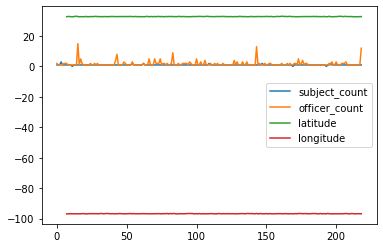

In [18]:
data.plot()

### Step 1.e: Read data into dataset
- Create first dataset `subject_incidents` as officers joined with incidents.
    - What does this dataset give us?
    - HINT:
    ```SQL
    SELECT * FROM table_1 JOIN table_2 ON table_1.column_name_1=table_2.column_name_2
    ```
    - HINT: You can join on columns `case_number`
- Is all data represented?

In [ ]:
testing=pd.read_sql('')

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- A step to get to understand the data better is to explore the data types
- Get the data types by `.dtypes`

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().sum()```

### Step 2.c: Explore subject_statuses column
- As part of finding useful features let's explore `subject_statuses`
- We know that `subject_statuses` is categorical.
- Therefore we can use `groupby(...)` and `count()`

### Step 2.d: Explore race column
- Repeat of previous step on column `race`

### Step 2.e: Explore more columns
- Feel free to explore more columns (also called features)

### Step 2.f: Visualize ideas
- We want to make a visual plot of the shooting incident
- Let's explore if we can make a plot based on longitude and latitude.
    - HINT: use `plot.scatter(x='longitude', y='latitude')`
- Then the analysis phase will focus on how to make useful insights with the feature selections.

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature selection
- Here we will continue with the features selected feel free to explore other features.
- Create a `dataset` with the features: `race`, `subject_statuses`, `latitude`, `longitude`
    - HINT: Select the features of the DataFrame `subject_incidents` by filtering with a list of the columns.
- To make further processing easier apply `dropna()` to remove missing data.

### Step 3.b: How to visualize features
- We want to visualize the two features: `race` and `subject_statuses`
- A way to visualize data is by color and size.
- Idea:
    - Map the race features to colors
    - Map the subject_statuses to a size

### Step 3.b.1: Convert column
- The `race` column has the following categories: B, W, A, L
- We can map that to color values ([docs](https://matplotlib.org/stable/gallery/color/named_colors.html))
- A simple way to map columns is by using `apply` on a lambda-function.
    - Create a dict with the mapping:
    ```Python
mapping = {'B': 'blue', 'W': 'yellow', 'A': 'red', 'L': 'cyan'}
```
    - Do the mapping with `apply`and `lambda` as follows
    ```Python
dataset['race'] = dataset['race'].apply(lambda x: mapping[x])
```

### Step 3.b.2: Convert column
- The `subject_statuses` has the following categories: `'1 Deceased 1 Injured', '2 Injured', 'Deceased', 'Deceased Injured', 'Injured', 'Other', 'Shoot and Miss'`
- The main categories are: `'Deceased', 'Injured', 'Shoot and Miss'`
- A simple way is quite similar to last step.
    - Create a mapping of the main categories:
    ```Python
mapping = {'Deceased': 1000, 'Injured': 500, 'Shoot and Miss': 250}
```
    - Do the mapping with `apply`and `lambda` as follows
    ```Python
dataset['subject_statuses'] = dataset['subject_statuses'].apply(lambda x: mapping.get(x, 100))
```

### Step 3.c: Visualize the data
- Now we can visualize the data
- This can be done with a scatter plot
```Python
dataset.plot.scatter(x='longitude', y='latitude', s='subject_statuses', c='race', alpha=.5)
```
- Where `s=` is the size feature and `c=` is the color feature, `figsize=` sets the size of the figure, `alpha=` sets the transparency of the dots.

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present a chart
- The goal here is to present your message
- Visualize one chart
- Add a headline (title) to give the audience a message

### Step 4.b (Optional): Further improvements
- Ideas to improve the visualization
- Add description (legends) with color and size description.
- Visualize it on a map
    - You could use [folium](https://python-visualization.github.io/folium/)
    - Explore [quick guide](https://python-visualization.github.io/folium/quickstart.html)

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a (Optional): Are there any insights?
- Any insights you want to highlight?
- Any future measurements?